In [15]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('data_motores.csv')
pd.set_option('display.max_columns', None)

In [16]:
df1["Eficiencia (%)"]               = df1["Eficiencia (%)"]/100
df1["Factor de carga maximo"]       = df1["Factor de carga maximo"]/100
df1['Potencia Entrada (W)']         = (df1['Potencia (HP)'] * 746 * (df1['Factor de carga maximo'])) / (df1['Eficiencia (%)'])
df1['Potencia Salida (W)']  = (df1['Potencia (HP)'] * 746 * (df1['Factor de carga maximo']))
df1['Pérdidas Motor (W)']           = df1['Potencia Entrada (W)'] - df1['Potencia Salida (W)']
df1['Corriente a 220V (A)']         = df1['Potencia Entrada (W)'] / (np.sqrt(3) * 220 * df1['Factor de potencia'])
df1['Corriente a 380V (A)']         = df1['Potencia Entrada (W)'] / (np.sqrt(3) * 380 * df1['Factor de potencia'])
df1['Corriente a 220V (A) +25%']    = df1['Corriente a 220V (A)']*1.25
df1['Corriente a 380V (A) +25%']    = df1['Corriente a 380V (A)']*1.25
df1['Velocidad síncrona (RPM)']     = 3600

In [17]:
catalogo                            = pd.read_csv('catalogo_motores.csv')
catalogo['Potencia HP']             = catalogo['Potencia HP'].astype(int)
df2                                 = pd.merge(df1, catalogo[['Potencia HP', 'Velocidad rpm']], left_on='Potencia (HP)', right_on='Potencia HP', how='left')
df2.drop(columns=['Potencia HP'], inplace=True)
df2                                 = df2.rename(columns={'Velocidad rpm': 'Velocidad real (RPM)'})
df2['Deslizamiento (RPM)']          = df2['Velocidad síncrona (RPM)'] - df2['Velocidad real (RPM)']
df2['Deslizamiento (%)']            = ((df2['Velocidad síncrona (RPM)'] - df2['Velocidad real (RPM)']) / df2['Velocidad síncrona (RPM)'])*100
df2['Torque (N.m)']                 = (df2['Potencia (HP)'] * 746 * (df1['Factor de carga maximo'])) / ((df2['Velocidad real (RPM)'] * 2 * np.pi)/60)
df2['theta (°)']                    = np.degrees(np.arccos(df2['Factor de potencia']))
df2['Real Corriente 220V Normal']          = df2['Corriente a 220V (A)'] * np.cos(np.radians(df2['theta (°)']))
df2['Imaginaria Corriente 220V Normal']    = df2['Corriente a 220V (A)'] * np.sin(np.radians(df2['theta (°)']))
df2['Real Corriente 380V Normal']          = df2['Corriente a 380V (A)'] * np.cos(np.radians(df2['theta (°)']))
df2['Imaginaria Corriente 380V Normal']    = df2['Corriente a 380V (A)'] * np.sin(np.radians(df2['theta (°)']))
df2['Real Corriente 220V +25%']          = df2['Corriente a 220V (A) +25%'] * np.cos(np.radians(df2['theta (°)']))
df2['Imaginaria Corriente 220V +25%']    = df2['Corriente a 220V (A) +25%'] * np.sin(np.radians(df2['theta (°)']))
df2['Real Corriente 380V +25%']          = df2['Corriente a 380V (A) +25%'] * np.cos(np.radians(df2['theta (°)']))
df2['Imaginaria Corriente 380V +25%']    = df2['Corriente a 380V (A) +25%'] * np.sin(np.radians(df2['theta (°)']))
df2["kw/año"]                       = (df2["Potencia Entrada (W)"]/1000) * 6696
df2["costo/año"]                    = df2["kw/año"] * 1009.04

df2["cambio FC"]                    = np.where(df2["Factor de carga maximo"] < 0.8, "Si", "No")
df2["cambio Eficiencia"]            = np.where(df2["Eficiencia (%)"] < 0.85, "Si", "No")
df2["cambio"]                       = np.where((df2["cambio FC"] == "Si") | (df2["cambio Eficiencia"] == "Si"), "Si", "No")

In [18]:
df2.to_csv('data_motores_procesada.csv', index=False)

In [19]:
Corriente_Planta_1_220V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 1']['Real Corriente 220V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 1']['Imaginaria Corriente 220V Normal'].sum())**2)
Corriente_Planta_2_220V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 2']['Real Corriente 220V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 2']['Imaginaria Corriente 220V Normal'].sum())**2)
Corriente_Planta_3_220V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 3']['Real Corriente 220V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 3']['Imaginaria Corriente 220V Normal'].sum())**2)
Corriente_Planta_4_220V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 4']['Real Corriente 220V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 4']['Imaginaria Corriente 220V Normal'].sum())**2)
Corriente_Planta_5_220V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 5']['Real Corriente 220V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 5']['Imaginaria Corriente 220V Normal'].sum())**2)

Corriente_Planta_1_380V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 1']['Real Corriente 380V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 1']['Imaginaria Corriente 380V Normal'].sum())**2)
Corriente_Planta_2_380V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 2']['Real Corriente 380V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 2']['Imaginaria Corriente 380V Normal'].sum())**2)
Corriente_Planta_3_380V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 3']['Real Corriente 380V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 3']['Imaginaria Corriente 380V Normal'].sum())**2)
Corriente_Planta_4_380V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 4']['Real Corriente 380V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 4']['Imaginaria Corriente 380V Normal'].sum())**2)
Corriente_Planta_5_380V_Normal = np.sqrt((df2[df2['Planta'] == 'Planta 5']['Real Corriente 380V Normal'].sum())**2 + (df2[df2['Planta'] == 'Planta 5']['Imaginaria Corriente 380V Normal'].sum())**2)

Potencia_Planta_1_220 = 220*Corriente_Planta_1_220V_Normal
Potencia_Planta_2_220 = 220*Corriente_Planta_2_220V_Normal
Potencia_Planta_3_220 = 220*Corriente_Planta_3_220V_Normal
Potencia_Planta_4_220 = 220*Corriente_Planta_4_220V_Normal
Potencia_Planta_5_220 = 220*Corriente_Planta_5_220V_Normal

Potencia_Planta_1_380 = 380*Corriente_Planta_1_380V_Normal
Potencia_Planta_2_380 = 380*Corriente_Planta_2_380V_Normal
Potencia_Planta_3_380 = 380*Corriente_Planta_3_380V_Normal
Potencia_Planta_4_380 = 380*Corriente_Planta_4_380V_Normal
Potencia_Planta_5_380 = 380*Corriente_Planta_5_380V_Normal

# PARA 220V

Magnitud de corriente a 220V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 1

In [20]:
Corriente_Planta_1_220V = np.sqrt((df2[df2['Planta'] == 'Planta 1']['Real Corriente 220V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 1']['Imaginaria Corriente 220V +25%'].sum())**2)
print(f'Magnitud de corriente a 220V para los motores de la planta 1: {Corriente_Planta_1_220V} A')

Magnitud de corriente a 220V para los motores de la planta 1: 740.8613845652662 A


Magnitud de corriente a 220V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 2

In [21]:
Corriente_Planta_2_220V = np.sqrt((df2[df2['Planta'] == 'Planta 2']['Real Corriente 220V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 2']['Imaginaria Corriente 220V +25%'].sum())**2)
print(f'Magnitud de corriente a 220V para los motores de la planta 2: {Corriente_Planta_2_220V} A')

Magnitud de corriente a 220V para los motores de la planta 2: 1055.846103440497 A


Magnitud de corriente a 220V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 3

In [22]:
Corriente_Planta_3_220V = np.sqrt((df2[df2['Planta'] == 'Planta 3']['Real Corriente 220V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 3']['Imaginaria Corriente 220V +25%'].sum())**2)
print(f'Magnitud de corriente a 220V para los motores de la planta 3: {Corriente_Planta_3_220V} A')

Magnitud de corriente a 220V para los motores de la planta 3: 1184.1293915625126 A


Magnitud de corriente a 220V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 4

In [23]:
Corriente_Planta_4_220V = np.sqrt((df2[df2['Planta'] == 'Planta 4']['Real Corriente 220V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 4']['Imaginaria Corriente 220V +25%'].sum())**2)
print(f'Magnitud de corriente a 220V para los motores de la planta 4: {Corriente_Planta_4_220V} A')

Magnitud de corriente a 220V para los motores de la planta 4: 774.7133890486778 A


Magnitud de corriente a 220V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 5

In [24]:
Corriente_Planta_5_220V = np.sqrt((df2[df2['Planta'] == 'Planta 5']['Real Corriente 220V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 5']['Imaginaria Corriente 220V +25%'].sum())**2)
print(f'Magnitud de corriente a 220V para los motores de la planta 5: {Corriente_Planta_5_220V} A')

Magnitud de corriente a 220V para los motores de la planta 5: 1396.9715056603966 A


# PARA 380V

Magnitud de corriente a 380V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 1

In [25]:
Corriente_Planta_1_380V = np.sqrt((df2[df2['Planta'] == 'Planta 1']['Real Corriente 380V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 1']['Imaginaria Corriente 380V +25%'].sum())**2)
print(f'Magnitud de corriente a 380V para los motores de la planta 1: {Corriente_Planta_1_380V} A')

Magnitud de corriente a 380V para los motores de la planta 1: 428.91974895883834 A


Magnitud de corriente a 380V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 2

In [26]:
Corriente_Planta_2_380V = np.sqrt((df2[df2['Planta'] == 'Planta 2']['Real Corriente 380V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 2']['Imaginaria Corriente 380V +25%'].sum())**2)
print(f'Magnitud de corriente a 380V para los motores de la planta 2: {Corriente_Planta_2_380V} A')

Magnitud de corriente a 380V para los motores de la planta 2: 611.2793230444981 A


Magnitud de corriente a 380V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 3

In [27]:
Corriente_Planta_3_380V = np.sqrt((df2[df2['Planta'] == 'Planta 3']['Real Corriente 380V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 3']['Imaginaria Corriente 380V +25%'].sum())**2)
print(f'Magnitud de corriente a 380V para los motores de la planta 3: {Corriente_Planta_3_380V} A')

Magnitud de corriente a 380V para los motores de la planta 3: 685.5485951151388 A


Magnitud de corriente a 380V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 4

In [28]:
Corriente_Planta_4_380V = np.sqrt((df2[df2['Planta'] == 'Planta 4']['Real Corriente 380V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 4']['Imaginaria Corriente 380V +25%'].sum())**2)
print(f'Magnitud de corriente a 380V para los motores de la planta 4: {Corriente_Planta_4_380V} A')

Magnitud de corriente a 380V para los motores de la planta 4: 448.51827787028714 A


Magnitud de corriente a 380V para determinar el total de la corriente que se usará para dimensionar el grosor del cable sobre la Planta 5

In [29]:
Corriente_Planta_5_380V = np.sqrt((df2[df2['Planta'] == 'Planta 5']['Real Corriente 380V +25%'].sum())**2 + (df2[df2['Planta'] == 'Planta 5']['Imaginaria Corriente 380V +25%'].sum())**2)
print(f'Magnitud de corriente a 380V para los motores de la planta 5: {Corriente_Planta_5_380V} A')

Magnitud de corriente a 380V para los motores de la planta 5: 808.7729769612822 A


Debido a que existen consumos auxiliares, se tiene que estos consumen 480kW, se puede partir de que poseen un factor de potencia de FP = 1, por lo tanto es pertinente calcular su consumo de corriente a 220V que es al voltaje al cual se encuentran conectados, suponiendo que son cargas puramente resistivas, estas no cuentan con desfase por lo tanto no poseen parte imaginaria, por lo que:

In [30]:
FP_aux = 1
Corriente_Auxiliares = 480000/(np.sqrt(3)*220*FP_aux)
print(f'Magnitud de corriente a 220V para los Auxiliares: {Corriente_Auxiliares} A')

Magnitud de corriente a 220V para los Auxiliares: 1259.6733145955473 A


## CAMBIO DE MOTORES ##

In [31]:
#calculo de 11 meses, donde se trabaja continuamente 16 horas al dia de lunes a sabado
diasXmes        = 24
horasXdia       = 16
horasXmes       = diasXmes * horasXdia
meses           = 11
horasX11meses   = horasXmes * meses

#calculo para el mes de diciembre
diasDiciembre   = 15
horasDiciembre  = diasDiciembre * horasXdia

#total horas por año
TOTALHORAS     = horasX11meses + horasDiciembre

Dado un transformador de 13200/220V, según el documento de publicación de tarifas del mes de mayo de 2024, se tiene que para un transformador de este tipo se encuentra en el Nivel II de consumo por lo que la tarifa a pagar por poseer un contador antes del transformador es de:

In [32]:
TARIFA_T1 = (914.75 + 918.01)/2
TARIFA_T1

916.38

Dado un transformador de 44000/220V, según el documento de publicación de tarifas del mes de mayo de 2024, se tiene que para un transformador de este tipo se encuentra en el Nivel III de consumo por lo que la tarifa a pagar por poseer un contador antes del transformador es de:

In [33]:
TARIFA_T2 = (798.52 + 801.84)/2
TARIFA_T2

800.1800000000001

In [34]:
df_catalogo = pd.read_csv("catalogo_motores_completo.csv")
def cambio(fc,potencia_hp,velocidad_sincronica,potencia_actual):
    #factor de carga, potencia_hp, potencia_actual
    costoXaño = (potencia_actual / 1000) * TOTALHORAS * TARIFA_T1 #Reemplazar TARIFA_T1 por TARIFA_T2 si se desea calcular con la tarifa T2
    df_filtro                           = df_catalogo[(df_catalogo["Potencia HP"] == potencia_hp) & (df_catalogo["rpm"] == velocidad_sincronica)].copy()
    df_filtro['Potencia Entrada (W)']   = (df_filtro ['Potencia HP'] * 746 * (fc)) / (df_filtro ['Eficiencia %']/100)
    df_filtro["kw/año"]                 = (df_filtro["Potencia Entrada (W)"]/1000) * TOTALHORAS
    df_filtro["costo/año"]              = df_filtro["kw/año"] * TARIFA_T1
    df_filtro["costo_anterior"]         = costoXaño
    df_filtro["ahorroXmes"]             = (df_filtro["costo_anterior"] - df_filtro["costo/año"]) / 12
    df_filtro["tiempo_retribucion"]     = df_filtro["costo_Pesos"] / df_filtro["ahorroXmes"]
    return df_filtro

In [35]:
#factor de carga, potencia_hp, potencia_actual
df_cambio = cambio(0.8,50,3600,35105.882352941175)
df_cambio

,No. de Depósito,Referencia,Potencia kW,Potencia HP,Tamaño constructivo,Velocidad rpm,Torque Nm,Corriente nominal 220VDD A,Corriente nominal 380VYY A,Corriente nominal 440VD A,Eficiencia %,Peso neto (IM B3) kg,Precio de lista USD,rpm,polos,costo_Pesos,(%) deslizamiento,Potencia Entrada (W),kw/año,costo/año,costo_anterior,ahorroXmes,tiempo_retribucion
13,100664589,1LE0143-2BA16-4AA4-Z D80+D81,37.0,50.0,225M,3570,99.0,118.0,68.0,59.0,93.0,320.0,4502.5,3600,2,17487710.0,0.833333,32086.021505,143232.0,1.312549e+08,1.436083e+08,1.029451e+06,16.987422


In [36]:
df2.head()

,Planta,Distancia,Motor,Potencia (HP),Eficiencia (%),Factor de carga maximo,Factor de potencia,Potencia Entrada (W),Corriente a 220V (A),Corriente a 380V (A),Potencia Salida (W),Pérdidas Motor (W),Corriente a 220V (A) +25%,Corriente a 380V (A) +25%,Velocidad síncrona (RPM),Velocidad real (RPM),Deslizamiento (RPM),Deslizamiento (%),Torque (N.m),theta (°),Real Corriente 220V Normal,Imaginaria Corriente 220V Normal,Real Corriente 380V Normal,Imaginaria Corriente 380V Normal,Real Corriente 220V +25%,Imaginaria Corriente 220V +25%,Real Corriente 380V +25%,Imaginaria Corriente 380V +25%,kw/año,costo/año,cambio FC,cambio Eficiencia,cambio
0,Planta 1,200,1,30,0.70,0.8,0.74,25577.142857,90.706206,52.514119,17904.0,7673.142857,113.382757,65.642649,3600,3540,60,1.666667,48.296781,42.268584,67.122592,61.009617,38.860448,35.321357,83.903240,76.262021,48.575560,44.151697,171264.548571,1.728128e+08,No,Si,Si
1,Planta 2,300,1,40,0.79,0.8,0.82,30217.721519,96.708479,55.989120,23872.0,6345.721519,120.885599,69.986399,3600,3565,35,0.972222,63.944126,34.915206,79.300953,55.352406,45.911078,32.046130,99.126191,69.190507,57.388848,40.057662,202337.863291,2.041670e+08,No,Si,Si
2,Planta 3,350,1,60,0.85,0.6,0.78,31595.294118,106.302748,61.543696,26856.0,4739.294118,132.878435,76.929620,3600,3570,30,0.833333,71.836389,38.739425,82.916143,66.522082,48.004083,38.512784,103.645179,83.152602,60.005104,48.140980,211562.089412,2.134746e+08,Si,No,Si
3,Planta 4,300,1,30,0.82,0.6,0.78,16375.609756,55.095936,31.897647,13428.0,2947.609756,68.869921,39.872059,3600,3540,60,1.666667,36.222586,38.739425,42.974830,34.477908,24.880165,19.960894,53.718538,43.097385,31.100206,24.951118,109651.082927,1.106423e+08,Si,Si,Si
4,Planta 5,500,1,100,0.91,0.6,0.81,49186.813187,159.360381,92.261273,44760.0,4426.813187,199.200476,115.326591,3600,3570,30,0.833333,119.727315,35.904069,129.081908,93.453688,74.731631,54.104767,161.352385,116.817110,93.414539,67.630959,329354.901099,3.323323e+08,Si,No,Si


Según [Tabla verde, luego paso el link], dado un calibre de 500 mm2 se tiene una resistencia DC de Ohm/km para un cable de cobre, se tiene que posee una resistencia de 0.0366 Ohm por lo que si se requiere de una corriente determinada para alimentar cada planta a 220V o 380V es necesario aplicar una regla de 3 compuesta para extraer el valor de la resistencia de pérdida a partir de https://www.gt-engineering.it/en/technical-standards/ul-and-nfpa-standards/ul-508a/cable-ampacity-ul-508a/, también es de anotar que es posible alimentar con un solo cable a partir de suma de corrientes, es decir, con corrientes menores por cada cable que se use para complementar la corriente objetivo a usar.

![Imagen de WhatsApp 2024-05-29 a las 10.18.04_37d37f38.jpg](<attachment:Imagen de WhatsApp 2024-05-29 a las 10.18.04_37d37f38.jpg>)
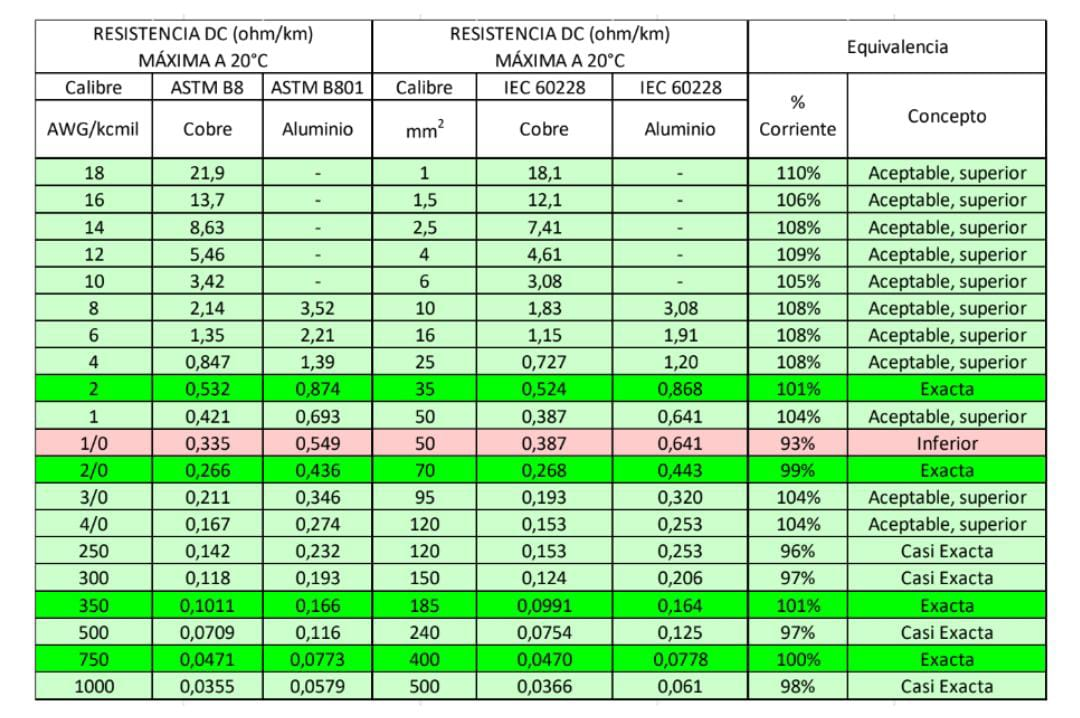

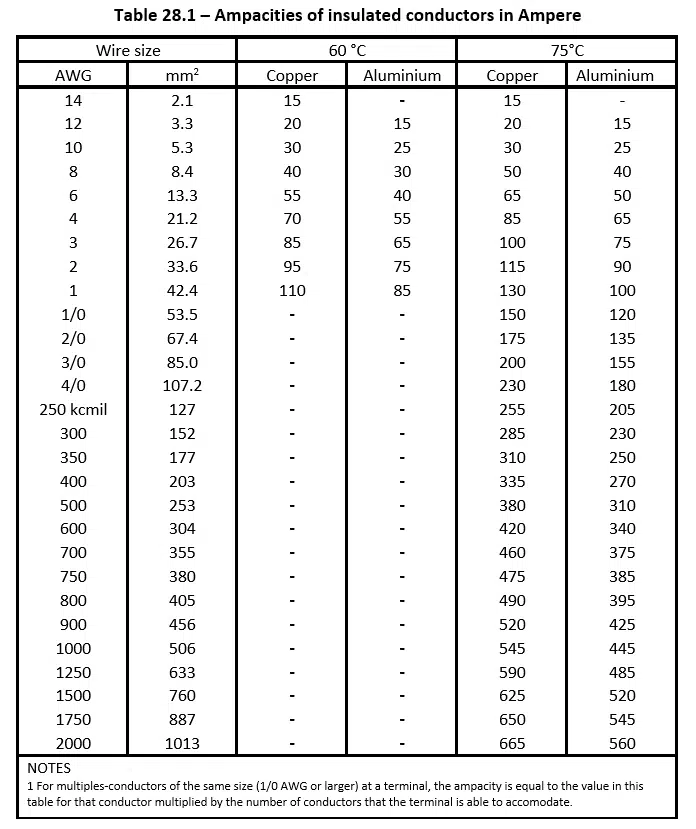

# PARA 220V

Grosor del cable sobre la Planta 1, a 220V:

In [37]:
print(f'La corriente necesaria es de {Corriente_Planta_1_220V} A para la planta 1, por lo que se necesita de dos cables que soporten 380 A de cobre, el cual corresponde a un valor de 500 kcmil.')

R_km_P1_220 = (500/253)*0.0366
print(f'El grosor del cable necesario para 380 A es de 253 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P1_220} Ohm')

Resistencia_Final_P1_220 = (200*R_km_P1_220)/1000
print(f'Ahora bien, la Planta 1 se encuentra a 200 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P1_220} Ohm')

La corriente necesaria es de 740.8613845652662 A para la planta 1, por lo que se necesita de dos cables que soporten 380 A de cobre, el cual corresponde a un valor de 500 kcmil.
El grosor del cable necesario para 380 A es de 253 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.07233201581027668 Ohm
Ahora bien, la Planta 1 se encuentra a 200 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.014466403162055335 Ohm


In [38]:
Paralelo_R_km_P1_220 = Resistencia_Final_P1_220/2
print(Paralelo_R_km_P1_220)
Perdida_P1_220 = Corriente_Planta_1_220V_Normal**2 * (Paralelo_R_km_P1_220)
print(Corriente_Planta_1_220V_Normal) 
print(f'La pérdida asociada a la corriente a 220V para la planta 1 de una sola línea son de {Perdida_P1_220} W')
Perdida_P1_220_Tri = 3*Perdida_P1_220
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P1_220_Tri} W')

0.007233201581027668
592.689107652213
La pérdida asociada a la corriente a 220V para la planta 1 de una sola línea son de 2540.8817879174903 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 7622.645363752471 W


Grosor del cable sobre la Planta 2, a 220V:

In [39]:
print(f'La corriente necesaria es de {Corriente_Planta_2_220V} A para la planta 1, por lo que se necesita de dos cables que soporten 545 A de cobre, el cual corresponde a un valor de 1000 kcmil.')

R_km_P2_220 = (500/506)*0.0366
print(f'El grosor del cable necesario para 545 A es de 506 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P2_220} Ohm')

Resistencia_Final_P2_220 = (300*R_km_P2_220)/1000
print(f'Ahora bien, la Planta 2 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P2_220} Ohm')

La corriente necesaria es de 1055.846103440497 A para la planta 1, por lo que se necesita de dos cables que soporten 545 A de cobre, el cual corresponde a un valor de 1000 kcmil.
El grosor del cable necesario para 545 A es de 506 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.03616600790513834 Ohm
Ahora bien, la Planta 2 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.010849802371541501 Ohm


In [40]:
Paralelo_R_km_P2_220 = Resistencia_Final_P2_220/2
Perdida_P2_220 = Corriente_Planta_2_220V_Normal**2 * (Paralelo_R_km_P2_220)
print(f'La pérdida asociada a la corriente a 220V para la planta 2 son de {Perdida_P2_220} W')
Perdida_P2_220_Tri = 3*Perdida_P2_220
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P2_220_Tri} W')

La pérdida asociada a la corriente a 220V para la planta 2 son de 3870.553269809416 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 11611.659809428249 W


Grosor del cable sobre la Planta 3, a 220V:

In [41]:
print(f'La corriente necesaria es de {Corriente_Planta_3_220V} A para la planta 1, por lo que se necesita de dos cables que soporten 625 A de cobre, el cual corresponde a un valor de 1500 kcmil.')

R_km_P3_220 = (500/887)*0.0366
print(f'El grosor del cable necesario para 625 A es de 887 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P3_220} Ohm')

Resistencia_Final_P3_220 = (350*R_km_P3_220)/1000
print(f'Ahora bien, la Planta 3 se encuentra a 350 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P3_220} Ohm')

La corriente necesaria es de 1184.1293915625126 A para la planta 1, por lo que se necesita de dos cables que soporten 625 A de cobre, el cual corresponde a un valor de 1500 kcmil.
El grosor del cable necesario para 625 A es de 887 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.020631341600901916 Ohm
Ahora bien, la Planta 3 se encuentra a 350 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.00722096956031567 Ohm


In [42]:
Paralelo_R_km_P3_220 = Resistencia_Final_P3_220/2
Perdida_P3_220 = Corriente_Planta_3_220V_Normal**2 * (Paralelo_R_km_P3_220)
print(f'La pérdida asociada a la corriente a 220V para la planta 3 son de {Perdida_P3_220} W')
Perdida_P3_220_Tri = 3*Perdida_P3_220
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P3_220_Tri} W')

La pérdida asociada a la corriente a 220V para la planta 3 son de 3239.991079770167 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 9719.9732393105 W


Grosor del cable sobre la Planta 4, a 220V:

In [43]:
print(f'La corriente necesaria es de {Corriente_Planta_4_220V} A para la planta 1, por lo que se necesita de dos cables que soporten 420 A de cobre, el cual corresponde a un valor de 600 kcmil.')

R_km_P4_220 = (500/304)*0.0366
print(f'El grosor del cable necesario para 420 A es de 304 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P4_220} Ohm')

Resistencia_Final_P4_220 = (300*R_km_P4_220)/1000
print(f'Ahora bien, la Planta 4 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P4_220} Ohm')

La corriente necesaria es de 774.7133890486778 A para la planta 1, por lo que se necesita de dos cables que soporten 420 A de cobre, el cual corresponde a un valor de 600 kcmil.
El grosor del cable necesario para 420 A es de 304 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.06019736842105263 Ohm
Ahora bien, la Planta 4 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.018059210526315792 Ohm


In [44]:
Paralelo_R_km_P4_220 = Resistencia_Final_P4_220/2
Perdida_P4_220 = Corriente_Planta_4_220V_Normal**2 * (Paralelo_R_km_P4_220)
print(f'La pérdida asociada a la corriente a 220V para la planta 4 son de {Perdida_P4_220} W')
Perdida_P4_220_Tri = 3*Perdida_P4_220
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P4_220_Tri} W')

La pérdida asociada a la corriente a 220V para la planta 4 son de 3468.4134579898637 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 10405.240373969591 W


Grosor del cable sobre la Planta 5, a 220V:

In [45]:
print(f'La corriente necesaria es de {Corriente_Planta_5_220V} A para la planta 1, por lo que se necesita de tres cables que soporten 475 A de cobre, el cual corresponde a un valor de 750 kcmil.')

R_km_P5_220 = (500/380)*0.0366
print(f'El grosor del cable necesario para 475 A es de 380 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P5_220} Ohm')

Resistencia_Final_P5_220 = (500*R_km_P5_220)/1000
print(f'Ahora bien, la Planta 5 se encuentra a 500 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P5_220} Ohm')

La corriente necesaria es de 1396.9715056603966 A para la planta 1, por lo que se necesita de tres cables que soporten 475 A de cobre, el cual corresponde a un valor de 750 kcmil.
El grosor del cable necesario para 475 A es de 380 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.04815789473684211 Ohm
Ahora bien, la Planta 5 se encuentra a 500 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.024078947368421054 Ohm


In [46]:
Paralelo_R_km_P5_220 = Resistencia_Final_P5_220/3
Perdida_P5_220 = Corriente_Planta_5_220V_Normal**2 * (Paralelo_R_km_P5_220)
print(f'La pérdida asociada a la corriente a 220V para la planta 5 son de {Perdida_P5_220} W')
Perdida_P5_220_Tri = 3*Perdida_P5_220
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P5_220_Tri} W')

La pérdida asociada a la corriente a 220V para la planta 5 son de 10024.698328021188 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 30074.094984063566 W


# PARA 380V

Grosor del cable sobre la Planta 1, a 380V:

In [47]:
print(f'La corriente necesaria es de {Corriente_Planta_1_380V} A para la planta 1, por lo que se necesita de un solo cable que soporte 445 A de aluminio, el cual corresponde a un valor de 1000 kcmil.')

R_km_P1_380 = (500/506)*0.061
print(f'El grosor del cable necesario para 445 A es de 506 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P1_380} Ohm')

Resistencia_Final_P1_380 = (200*R_km_P1_380)/1000
print(f'Ahora bien, la Planta 1 se encuentra a 200 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P1_380} Ohm')

La corriente necesaria es de 428.91974895883834 A para la planta 1, por lo que se necesita de un solo cable que soporte 445 A de aluminio, el cual corresponde a un valor de 1000 kcmil.
El grosor del cable necesario para 445 A es de 506 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.06027667984189723 Ohm
Ahora bien, la Planta 1 se encuentra a 200 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.012055335968379446 Ohm


In [48]:
Perdida_P1_380 = Corriente_Planta_1_380V_Normal**2 * (Resistencia_Final_P1_380)
print(f'La pérdida asociada a la corriente a 380V para la planta 1 son de {Perdida_P1_380} W')
Perdida_P1_380_Tri = 3*Perdida_P1_380
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P1_380_Tri} W')

La pérdida asociada a la corriente a 380V para la planta 1 son de 1419.4214974054307 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 4258.264492216293 W


Grosor del cable sobre la Planta 2, a 380V:

In [49]:
print(f'La corriente necesaria es de {Corriente_Planta_2_380V} A para la planta 1, por lo que se necesita de un solo cable que soporte 625 A de cobre, el cual corresponde a un valor de 1500 kcmil.')

R_km_P2_380 = (500/760)*0.0366
print(f'El grosor del cable necesario para 545 A es de 760 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P2_380} Ohm')

Resistencia_Final_P2_380 = (300*R_km_P2_380)/1000
print(f'Ahora bien, la Planta 2 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P2_380} Ohm')

La corriente necesaria es de 611.2793230444981 A para la planta 1, por lo que se necesita de un solo cable que soporte 625 A de cobre, el cual corresponde a un valor de 1500 kcmil.
El grosor del cable necesario para 545 A es de 760 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.024078947368421054 Ohm
Ahora bien, la Planta 2 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.007223684210526316 Ohm


In [50]:
Perdida_P2_380 = Corriente_Planta_2_380V_Normal**2 * (Resistencia_Final_P2_380)
print(f'La pérdida asociada a la corriente a 380V para la planta 2 son de {Perdida_P2_380} W')
Perdida_P2_380_Tri = Perdida_P2_380
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P2_380_Tri} W')

La pérdida asociada a la corriente a 380V para la planta 2 son de 1727.5003243720023 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 1727.5003243720023 W


Grosor del cable sobre la Planta 3, a 380V:

In [51]:
print(f'La corriente necesaria es de {Corriente_Planta_3_380V} A para la planta 1, por lo que se necesita de dos cables que soporte 375 A de aluminio, el cual corresponde a un valor de 700 kcmil.')

R_km_P3_380 = (500/355)*0.061
print(f'El grosor del cable necesario para 375 A es de 355 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P3_380} Ohm')

Resistencia_Final_P3_380 = (350*R_km_P3_380)/1000
print(f'Ahora bien, la Planta 3 se encuentra a 350 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P3_380} Ohm')

La corriente necesaria es de 685.5485951151388 A para la planta 1, por lo que se necesita de dos cables que soporte 375 A de aluminio, el cual corresponde a un valor de 700 kcmil.
El grosor del cable necesario para 375 A es de 355 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.08591549295774648 Ohm
Ahora bien, la Planta 3 se encuentra a 350 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.030070422535211267 Ohm


In [52]:
Paralelo_R_km_P3_380 = Resistencia_Final_P3_220/2
Perdida_P3_380 = Corriente_Planta_3_380V_Normal**2 * (Paralelo_R_km_P3_380)
print(f'La pérdida asociada a la corriente a 220V para la planta 5 son de {Perdida_P3_380} W')
Perdida_P3_380_Tri = 3*Perdida_P3_380
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P3_380_Tri} W')

La pérdida asociada a la corriente a 220V para la planta 5 son de 1085.9803896182552 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 3257.9411688547657 W


Grosor del cable sobre la Planta 4, a 380V:

In [53]:
print(f'La corriente necesaria es de {Corriente_Planta_4_380V} A para la planta 1, por lo que se necesita de un solo cable que soporte 460 A de cobre, el cual corresponde a un valor de 750 kcmil.')

R_km_P4_380 = (500/355)*0.0366
print(f'El grosor del cable necesario para 460 A es de 355 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P4_380} Ohm')

Resistencia_Final_P4_380 = (300*R_km_P4_380)/1000
print(f'Ahora bien, la Planta 4 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P4_380} Ohm')

La corriente necesaria es de 448.51827787028714 A para la planta 1, por lo que se necesita de un solo cable que soporte 460 A de cobre, el cual corresponde a un valor de 750 kcmil.
El grosor del cable necesario para 460 A es de 355 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.05154929577464788 Ohm
Ahora bien, la Planta 4 se encuentra a 300 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.015464788732394364 Ohm


In [54]:
Perdida_P4_380 = Corriente_Planta_4_380V_Normal**2 * (Resistencia_Final_P4_380)
print(f'La pérdida asociada a la corriente a 380V para la planta 2 son de {Perdida_P4_380} W')
Perdida_P4_380_Tri = 3*Perdida_P4_380
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P4_380_Tri} W')

La pérdida asociada a la corriente a 380V para la planta 2 son de 1991.0595862619343 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 5973.178758785803 W


Grosor del cable sobre la Planta 5, a 380V:

In [55]:
print(f'La corriente necesaria es de {Corriente_Planta_5_380V} A para la planta 1, por lo que se necesita de dos cables que soporte 420 A de cobre, el cual corresponde a un valor de 600 kcmil.')

R_km_P5_380 = (500/420)*0.0366
print(f'El grosor del cable necesario para 420 A es de 304 mm\u00B2, por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de {R_km_P5_380} Ohm')

Resistencia_Final_P5_380 = (500*R_km_P5_380)/1000
print(f'Ahora bien, la Planta 3 se encuentra a 500 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a {Resistencia_Final_P5_380} Ohm')

La corriente necesaria es de 808.7729769612822 A para la planta 1, por lo que se necesita de dos cables que soporte 420 A de cobre, el cual corresponde a un valor de 600 kcmil.
El grosor del cable necesario para 420 A es de 304 mm², por lo cual la regla de 3 inversa necesaria para obtener la resistencia de Ohm/km es de 0.04357142857142857 Ohm
Ahora bien, la Planta 3 se encuentra a 500 metros del transformador, por lo cual la resistencia de pérdida será menor, esta equivale a 0.021785714285714287 Ohm


In [56]:
Paralelo_R_km_P5_380 = Resistencia_Final_P5_380/2
Perdida_P5_380 = Corriente_Planta_5_380V_Normal**2 * (Paralelo_R_km_P5_380)
print(f'La pérdida asociada a la corriente a 220V para la planta 5 son de {Perdida_P5_380} W')
Perdida_P5_380_Tri = 3*Perdida_P5_380
print(f'La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de {Perdida_P5_380_Tri} W')

La pérdida asociada a la corriente a 220V para la planta 5 son de 4560.107134175054 W
La pérdida asociada a la corrient e a 220V para la planta 1 para las 3 líneas son de 13680.321402525162 W


Esta ecuación es para cuando es a 220 o 380

PotenciaEntradaTransformador_sinAuxiliares = PotenciaEntradaTransformador_sinAuxiliares + (PotenciaPlanta(i) + PerdidasPlanta(i))/EficienciaTransformador

PotenciaEntradaTransformador = PotenciaEntradaTransformador_sinAuxiliares + Potencia_Auxiliares

CostoTotalAnual = PotenciaEntradaTransformador * DíasTrabajo_Año * Precio(Nivel 2 o 3)


In [62]:
PerdidasXPlanta_Trifasica_220 = [Perdida_P1_220_Tri, Perdida_P2_220_Tri, Perdida_P3_220_Tri, Perdida_P4_220_Tri, Perdida_P5_220_Tri]
PotenciaXPlanta_220 = [Potencia_Planta_1_220, Potencia_Planta_2_220, Potencia_Planta_3_220, Potencia_Planta_4_220, Potencia_Planta_5_220]

PotenciaEntradaTransformador_sinAuxiliares_220 = 0
Eficiencia_Transformador = 0.9
Potencia_Auxiliares = 480000

for i in range(len(PerdidasXPlanta_Trifasica_220)):
    PotenciaEntradaTransformador_sinAuxiliares_220 += (PerdidasXPlanta_Trifasica_220[i] + PotenciaXPlanta_220[i])/Eficiencia_Transformador

PotenciaEntradaTransformador_220 = PotenciaEntradaTransformador_sinAuxiliares_220 + Potencia_Auxiliares

print(f'La potencia de entrada del transformador a 220V es de {PotenciaEntradaTransformador_220:,} W')

La potencia de entrada del transformador a 220V es de 1,564,752.717825931 W


In [63]:
PerdidasXPlanta_Trifasica_380 = [Perdida_P1_380_Tri, Perdida_P2_380_Tri, Perdida_P3_380_Tri, Perdida_P4_380_Tri, Perdida_P5_380_Tri]
PotenciaXPlanta_380 = [Potencia_Planta_1_380, Potencia_Planta_2_380, Potencia_Planta_3_380, Potencia_Planta_4_380, Potencia_Planta_5_380]

PotenciaEntradaTransformador_sinAuxiliares_380 = 0
Eficiencia_Transformador = 0.9
Potencia_Auxiliares = 480000

for i in range(len(PerdidasXPlanta_Trifasica_380)):
    PotenciaEntradaTransformador_sinAuxiliares_380 += (PerdidasXPlanta_Trifasica_380[i] + PotenciaXPlanta_380[i])/Eficiencia_Transformador

PotenciaEntradaTransformador_380 = PotenciaEntradaTransformador_sinAuxiliares_380 + Potencia_Auxiliares

print(f'La potencia de entrada del transformador a 380V es de {PotenciaEntradaTransformador_380:,} W')

La potencia de entrada del transformador a 380V es de 1,519,712.2649106306 W


In [61]:
CostoTotal_220_13200 = PotenciaEntradaTransformador_220 * TOTALHORAS * TARIFA_T1
CostoTotal_380_13200 = PotenciaEntradaTransformador_380 * TOTALHORAS * TARIFA_T1
print(f'El costo total de la energía eléctrica consumida por los motores a 220V con un trasnformador de 13200/220 es de {CostoTotal_220_13200:,} pesos')
print(f'El costo total de la energía eléctrica consumida por los motores a 380V con un trasnformador de 13200/220 es de {CostoTotal_380_13200:,} pesos')

CostoTotal_220_44000 = PotenciaEntradaTransformador_220 * TOTALHORAS * TARIFA_T2
CostoTotal_380_44000 = PotenciaEntradaTransformador_380 * TOTALHORAS * TARIFA_T2
print(f'El costo total de la energía eléctrica consumida por los motores a 220V con un trasnformador de 44000/220 es de {CostoTotal_220_44000:,} pesos')
print(f'El costo total de la energía eléctrica consumida por los motores a 380V con un trasnformador de 44000/220 es de {CostoTotal_380_44000:,} pesos')

El costo total de la energía eléctrica consumida por los motores a 220V con un trasnformador de 13200/220 es de 6,400,965,738,585.763 pesos
El costo total de la energía eléctrica consumida por los motores a 380V con un trasnformador de 13200/220 es de 6,216,717,842,623.14 pesos
El costo total de la energía eléctrica consumida por los motores a 220V con un trasnformador de 44000/220 es de 5,589,302,216,003.793 pesos
El costo total de la energía eléctrica consumida por los motores a 380V con un trasnformador de 44000/220 es de 5,428,417,559,647.945 pesos
